In [123]:
import pandas as pd
dataset = pd.read_csv("./RandomGen/OptimalSizing/POWER_Point_Hourly_20220601_20230601_037d48N_126d68E_LST.csv")
dataset.head()

,YEAR,MO,DY,HR,WS10M,T2M,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,WS50M
0,2022,6,2,0,2.25,13.83,0.00,0.0,3.09
1,2022,6,2,1,2.34,13.62,0.00,0.0,3.24
2,2022,6,2,2,2.66,13.42,0.00,0.0,3.77
3,2022,6,2,3,3.02,13.42,0.00,0.0,4.47
4,2022,6,2,4,3.10,13.82,14.75,13.9,4.76


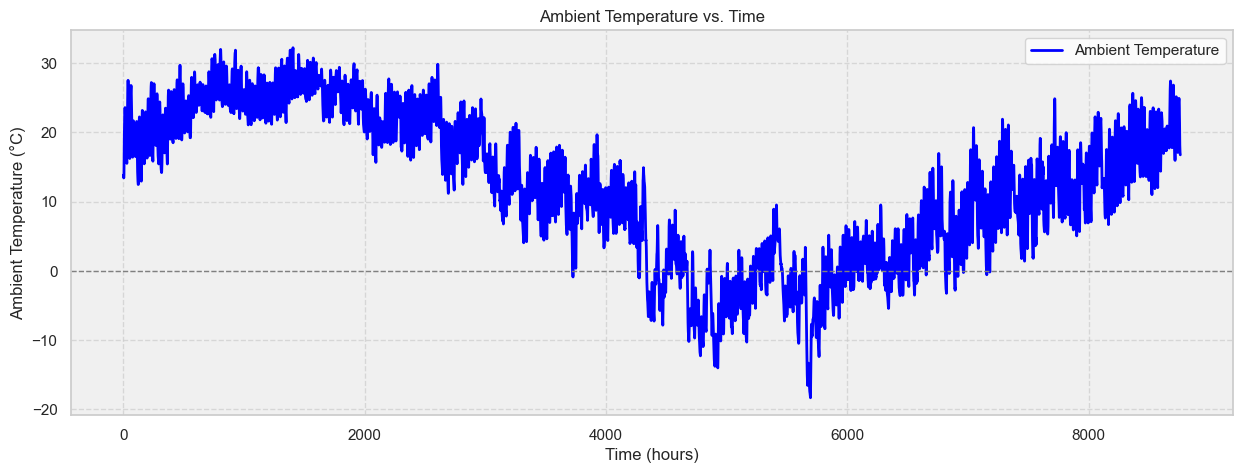

In [124]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset' is a Pandas DataFrame with a datetime index
# If not, you may need to convert your time column to a datetime index
# dataset['Time'] = pd.to_datetime(dataset['Time'])
# dataset.set_index('Time', inplace=True)

# Plotting Ambient Temperature vs. Time
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Plotting the data
plt.plot(dataset.index, dataset['T2M'], label='Ambient Temperature', color='blue', linewidth=2)

# Adding labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Ambient Temperature vs. Time')
plt.legend()  # Display legend if multiple lines are plotted
# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)
# Adding a background color to the plot for better readability
plt.gca().set_facecolor('#F0F0F0')
# Adding a horizontal line at 0°C (optional)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, label='Freezing Point')
plt.savefig('temperature.png', dpi=300, bbox_inches='tight')

plt.show()



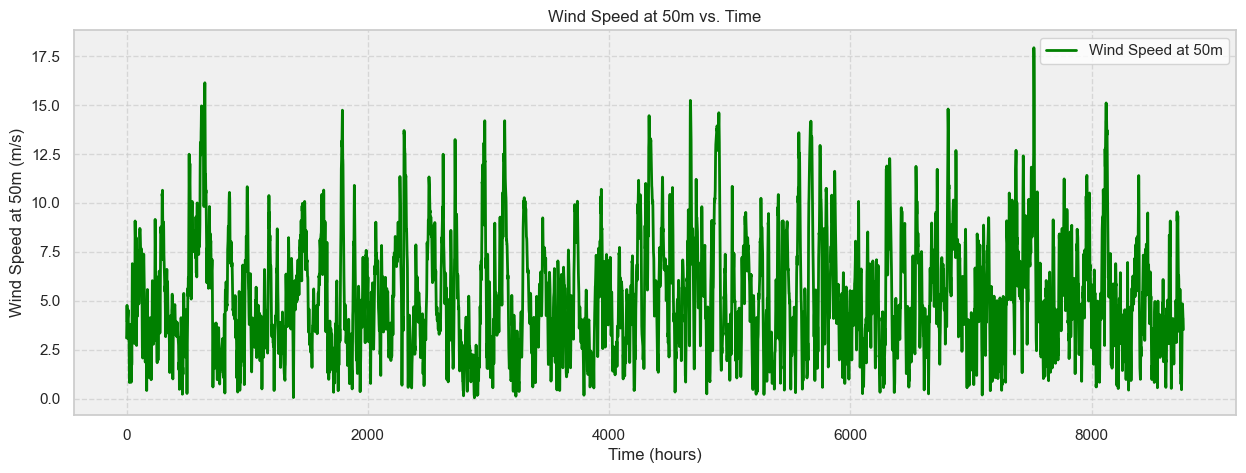

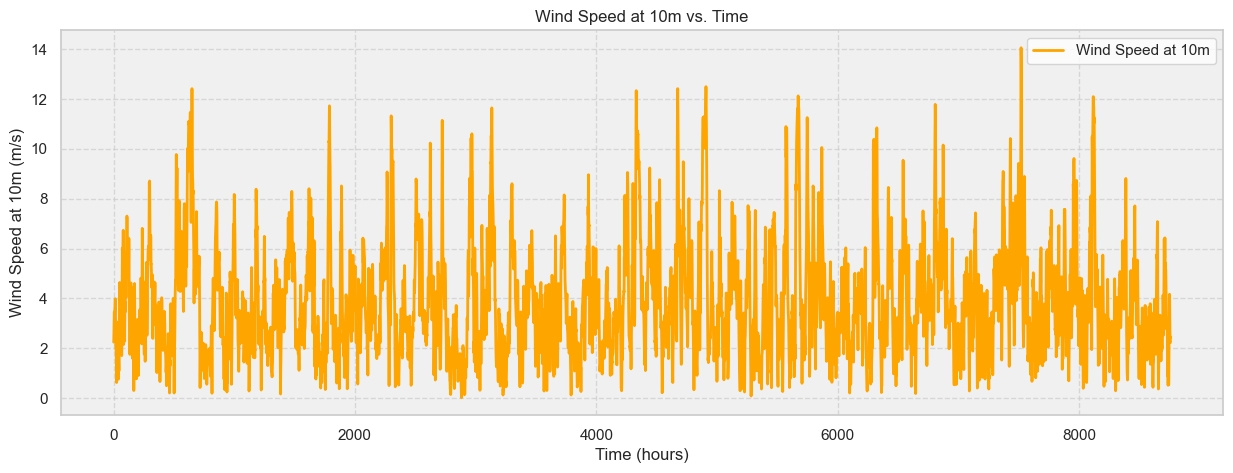

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset' is a Pandas DataFrame with a datetime index
# If not, you may need to convert your time column to a datetime index
# dataset['Time'] = pd.to_datetime(dataset['Time'])
# dataset.set_index('Time', inplace=True)

# Plotting Wind Speed at 50 meters vs. Time
plt.figure(figsize=(15, 5))

# Plotting the data
plt.plot(dataset.index, dataset['WS50M'], label='Wind Speed at 50m', color='green', linewidth=2)

# Adding labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Wind Speed at 50m (m/s)')
plt.title('Wind Speed at 50m vs. Time')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color to the plot
plt.gca().set_facecolor('#F0F0F0')

# Save the plot as an image (optional)
plt.savefig('wind_speed_50m_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Plotting Wind Speed at 10 meters vs. Time
plt.figure(figsize=(15, 5))

# Plotting the data
plt.plot(dataset.index, dataset['WS10M'], label='Wind Speed at 10m', color='orange', linewidth=2)

# Adding labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Wind Speed at 10m (m/s)')
plt.title('Wind Speed at 10m vs. Time')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color to the plot
plt.gca().set_facecolor('#F0F0F0')

# Save the plot as an image (optional)
plt.savefig('wind_speed_10m_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


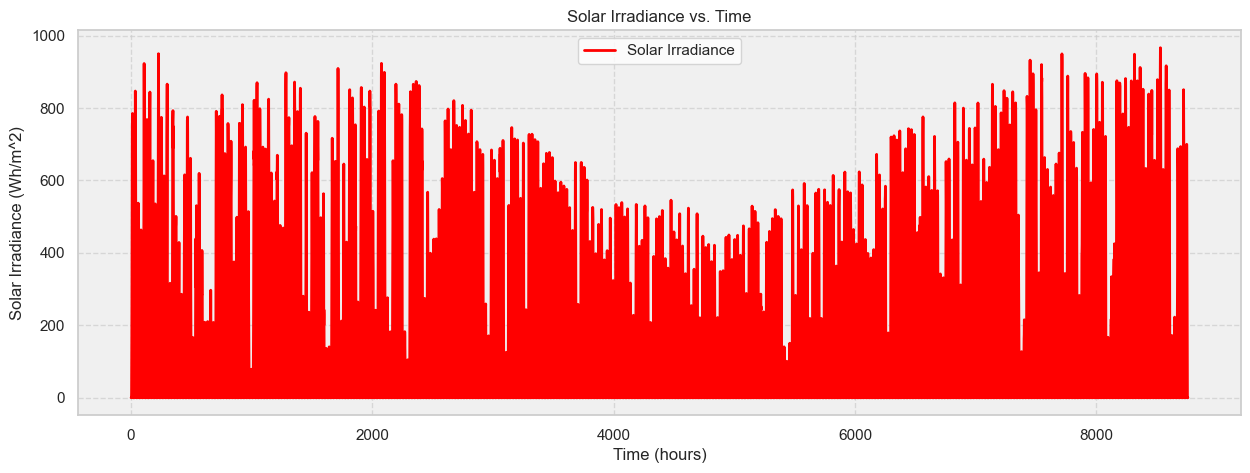

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dataset' is a Pandas DataFrame with a datetime index
# If not, you may need to convert your time column to a datetime index
# dataset['Time'] = pd.to_datetime(dataset['Time'])
# dataset.set_index('Time', inplace=True)

# Plotting All Sky Surface Shortwave Downward Irradiance vs. Time
plt.figure(figsize=(15, 5))

# Plotting the data
plt.plot(dataset.index, dataset['ALLSKY_SFC_SW_DWN'], label='Solar Irradiance', color='red', linewidth=2)

# Adding labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Solar Irradiance (Wh/m^2)')
plt.title('Solar Irradiance vs. Time')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color to the plot
plt.gca().set_facecolor('#F0F0F0')

# Save the plot as an image (optional)
plt.savefig('solar_irradiance_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


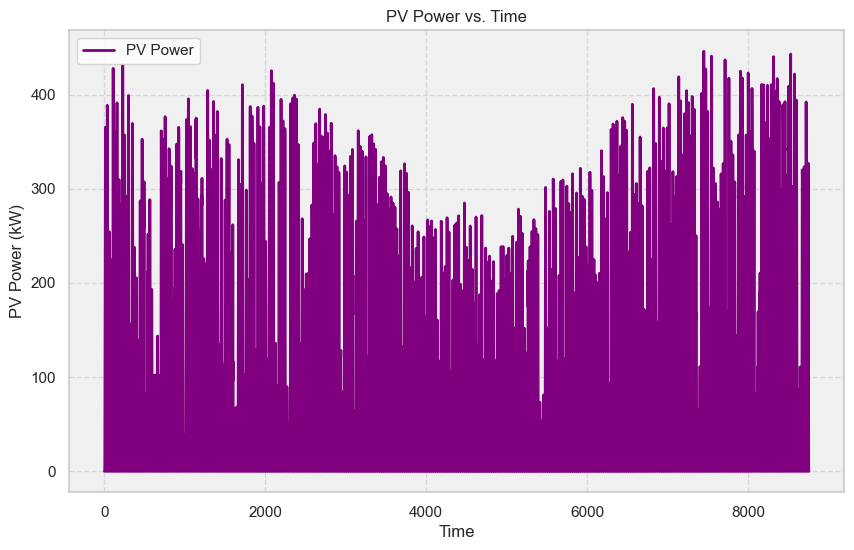

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataframe' is your pandas DataFrame with columns T2M and Solar Irradiance
# Make sure to replace 'dataframe' with the actual variable name you are using

# Constants
PvRated = 500  # Rated PV power in kW
k = -3.7e-3  # Temperature coefficient
Iref = 1000  # Reference solar irradiance in W/m^2
Tref = 25    # Reference temperature in degrees Celsius
dataframe = dataset.copy()

# Calculate the power at each timestep using the provided formula
dataframe['T_amb'] = dataframe['T2M'] + 0.0256 * dataframe['ALLSKY_SFC_SW_DWN']
dataframe['Power'] = PvRated * dataframe['ALLSKY_SFC_SW_DWN'] / Iref * (1 + k * (dataframe['T_amb'] - Tref))

# Plotting the calculated power
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(dataframe.index, dataframe['Power'], label='PV Power', color='purple', linewidth=2)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('PV Power (kW)')
plt.title('PV Power vs. Time')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color to the plot
plt.gca().set_facecolor('#F0F0F0')

# Save the plot as an image (optional)
# plt.savefig('pv_power_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [128]:
dataframe['Power'].describe()

count    8760.000000
mean       80.603285
std       114.327864
min         0.000000
25%         0.000000
50%         4.845539
75%       144.134227
max       445.993116
Name: Power, dtype: float64

In [129]:
import pandas as pd

# Assuming 'dataframe' is your pandas DataFrame with the 'WS10M' column
# Make sure to replace 'dataframe' with the actual variable name you are using

# Constants
V_rated = 9.5  # Rated wind speed in m/s
V_cutin = 2.5  # Cut-in wind speed in m/s
V_cutout = 20  # Cut-out wind speed in m/s
P_wtrat = 100  # Rated wind turbine power in kW

# Calculate constants 'a' and 'b'
a = P_wtrat / ((V_rated**3) - (V_cutin**3))
b = (V_cutin**3) / ((V_rated**3) - (V_cutin**3))

# Calculate wind turbine power output based on the provided piecewise function
def calculate_wind_turbine_power(V):
    if V <= V_cutin or V >= V_cutout:
        return 0
    elif V_cutin < V < V_rated:
        return a * V**3 - b * P_wtrat
    else:
        return P_wtrat

# Calculate and add wind turbine power output to the DataFrame
dataframe['Wind_Turbine_Power_Output'] = dataframe['WS50M'].apply(calculate_wind_turbine_power)

# Display the updated DataFrame with the calculated wind turbine power output
print(dataframe[['WS10M', 'Wind_Turbine_Power_Output']])


      WS10M  Wind_Turbine_Power_Output
0      2.25                   1.648783
1      2.34                   2.184404
2      2.66                   4.509371
3      3.02                   8.754336
4      3.10                  10.956362
...     ...                        ...
8755   2.44                   7.199290
8756   2.43                   6.451978
8757   2.47                   6.331571
8758   2.39                   5.136783
8759   2.24                   3.325121

[8760 rows x 2 columns]


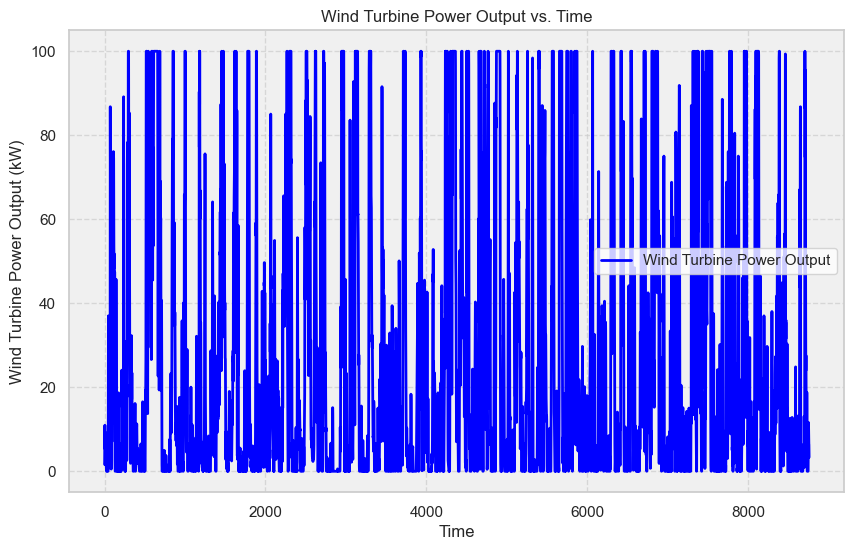

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataframe' is your pandas DataFrame with the 'WS10M' and 'Wind_Turbine_Power_Output' columns
# Make sure to replace 'dataframe' with the actual variable name you are using

# Plotting Wind Turbine Power Output vs. Time
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(dataframe.index, dataframe['Wind_Turbine_Power_Output'], label='Wind Turbine Power Output', color='blue', linewidth=2)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Wind Turbine Power Output (kW)')
plt.title('Wind Turbine Power Output vs. Time')
plt.legend()

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a background color to the plot
plt.gca().set_facecolor('#F0F0F0')

# Save the plot as an image (optional)
# plt.savefig('wind_turbine_power_output_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [131]:
dataframe['Wind_Turbine_Power_Output'].describe()

count    8760.000000
mean       25.244510
std        31.622974
min         0.000000
25%         1.319382
50%        10.438652
75%        38.370522
max       100.000000
Name: Wind_Turbine_Power_Output, dtype: float64

In [132]:
DataCSV = dataset[["YEAR","MO","DY","HR","WS50M","ALLSKY_SFC_SW_DWN","T2M"]]
DataCSV

,YEAR,MO,DY,HR,WS50M,ALLSKY_SFC_SW_DWN,T2M
0,2022,6,2,0,3.09,0.0,13.83
1,2022,6,2,1,3.24,0.0,13.62
2,2022,6,2,2,3.77,0.0,13.42
3,2022,6,2,3,4.47,0.0,13.42
4,2022,6,2,4,4.76,13.9,13.82
...,...,...,...,...,...,...,...
8755,2023,6,1,19,4.24,0.0,18.14
8756,2023,6,1,20,4.12,0.0,17.51
8757,2023,6,1,21,4.10,0.0,17.08
8758,2023,6,1,22,3.89,0.0,16.85


In [133]:
DataCSV.columns

Index(['YEAR', 'MO', 'DY', 'HR', 'WS50M', 'ALLSKY_SFC_SW_DWN', 'T2M'], dtype='object')

In [134]:
import pandas as pd

# Assuming 'dataframe' is your pandas DataFrame with columns 'YEAR', 'MO', 'DY', 'HR', 'WS50M', 'ALLSKY_SFC_SW_DWN', 'T2M'
# Make sure to replace 'dataframe' with the actual variable name you are using

# Create a function to map the month to the corresponding season
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a new 'Season' column
DataCSV['Season'] = DataCSV['MO'].apply(get_season)


C:\Users\talha\AppData\Local\Temp\ipykernel_5592\1376944011.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataCSV['Season'] = DataCSV['MO'].apply(get_season)


In [135]:
DataCSV

,YEAR,MO,DY,HR,WS50M,ALLSKY_SFC_SW_DWN,T2M,Season
0,2022,6,2,0,3.09,0.0,13.83,Summer
1,2022,6,2,1,3.24,0.0,13.62,Summer
2,2022,6,2,2,3.77,0.0,13.42,Summer
3,2022,6,2,3,4.47,0.0,13.42,Summer
4,2022,6,2,4,4.76,13.9,13.82,Summer
...,...,...,...,...,...,...,...,...
8755,2023,6,1,19,4.24,0.0,18.14,Summer
8756,2023,6,1,20,4.12,0.0,17.51,Summer
8757,2023,6,1,21,4.10,0.0,17.08,Summer
8758,2023,6,1,22,3.89,0.0,16.85,Summer


In [136]:
summer = pd.read_csv("./RandomGen/OptimalSizing/Summer.csv",header=None,usecols=[1]).reset_index()
winter = pd.read_csv("./RandomGen/OptimalSizing/Winter.csv",header=None,usecols=[1]).reset_index()
other = pd.read_csv("./RandomGen/OptimalSizing/Other.csv",header=None,usecols=[1]).reset_index()
# Convert the values in the specified columns to integers
summer["Load"] = summer[1].astype(int)
summer.drop(1, axis=1, inplace=True)
summer = summer.rename(columns={"index":"HR"})
winter["Load"] = winter[1].astype(int)
winter.drop(1, axis=1, inplace=True)
winter = winter.rename(columns={"index":"HR"})
other["Load"] = other[1].astype(int)
other.drop(1, axis=1, inplace=True)
other = other.rename(columns={"index":"HR"})
winter["Season"] = "Winter"
summer["Season"] = "Summer"
other["Season"] = "Spring"
other2 = other.copy()
other2["Season"] = "Autumn"

In [137]:
Loads_24hour_wrt_season = pd.concat([winter,summer,other,other2],axis=0) 
Loads_24hour_wrt_season

,HR,Load,Season
0,0,750,Winter
1,1,753,Winter
2,2,773,Winter
3,3,753,Winter
4,4,760,Winter
...,...,...,...
19,19,1365,Autumn
20,20,1270,Autumn
21,21,1168,Autumn
22,22,1134,Autumn


In [138]:
import pandas as pd

# Price data
hours = list(range(0, 24))
price1 = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.15, 0.20, 0.25, 0.25, 0.20, 0.20, 0.15, 0.15, 0.15, 0.20, 0.20, 0.25, 0.15, 0.15, 0.05]
price2 = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.15, 0.20, 0.20, 0.20, 0.20, 0.20, 0.15, 0.15, 0.15, 0.20, 0.20, 0.20, 0.15, 0.15, 0.05]

# Creating a DataFrame with 4 seasons
data = {'HR': hours * 4,  # Repeating hours for all 4 seasons
        'Season': ['Autumn'] * 24 + ['Spring'] * 24 + ['Summer'] * 24 + ['Winter'] * 24,  # Assigning seasons
        'Price': price1  + price2 * 3}  # Combining prices for all 4 seasons

df = pd.DataFrame(data)

# Print the DataFrame
df


,HR,Season,Price
0,0,Autumn,0.05
1,1,Autumn,0.05
2,2,Autumn,0.05
3,3,Autumn,0.05
4,4,Autumn,0.05
...,...,...,...
91,19,Winter,0.20
92,20,Winter,0.20
93,21,Winter,0.15
94,22,Winter,0.15


In [139]:
final = DataCSV.merge(Loads_24hour_wrt_season, how='left', left_on=["Season","HR"], right_on=["Season","HR"])
final_complete = final.merge(df, how='left', left_on=["Season","HR"], right_on=["Season","HR"])

In [140]:
final_complete.to_csv("./RandomGen/OptimalSizing/Datset.csv")

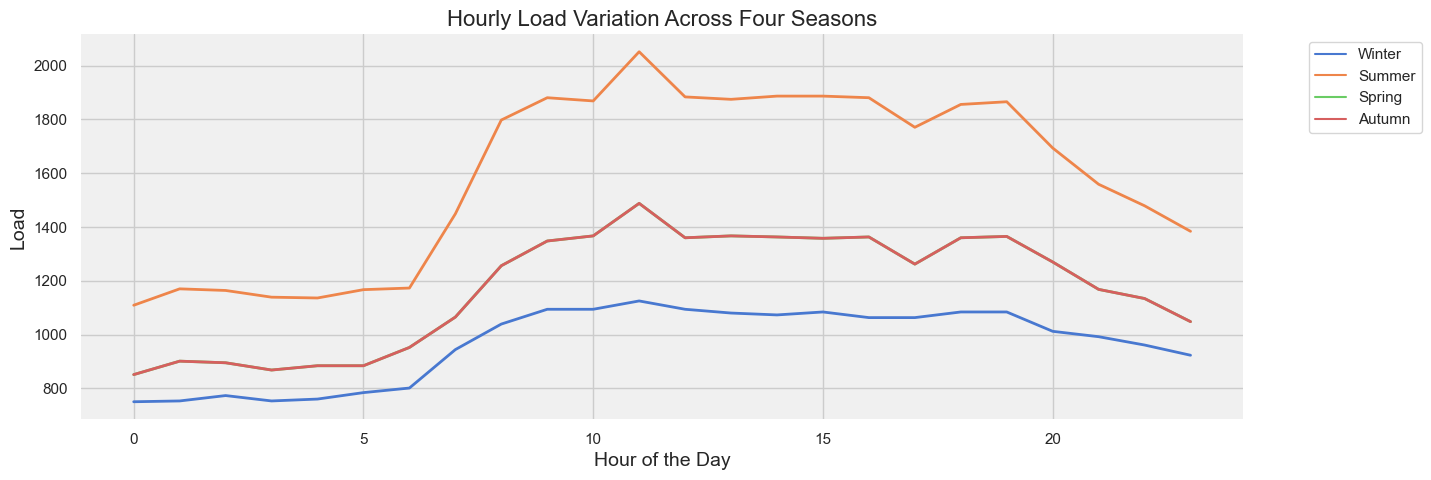

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Loads_24hour_wrt_season' is your concatenated DataFrame
# Replace 'Loads_24hour_wrt_season' with the actual variable name of your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot using seaborn for each season
plt.figure(figsize=(15, 5))

# Customize the lineplot with additional styling
sns.lineplot(x='HR', y='Load', hue='Season', data=Loads_24hour_wrt_season, palette='muted', linewidth=2)

# Adding labels and title with improved font size
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Load', fontsize=14)
plt.title('Hourly Load Variation Across Four Seasons', fontsize=16)

# Set legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set a light gray background for the plot
plt.gca().set_facecolor('#F0F0F0')

# Adjust grid style
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


In [142]:
price1 = [0.05,0.05,0.05,0.05,0.05,0.05,0.05, 0.15, 0.15, 0.15, 0.20 , 0.25 , 0.25 , 0.20, 0.20,0.15,0.15,0.15,0.20,0.20,0.25,0.15,0.15,0.05]
price2 = [0.05,0.05,0.05,0.05,0.05,0.05,0.05, 0.15, 0.15, 0.15, 0.20 , 0.20 , 0.20 , 0.20, 0.20,0.15,0.15,0.15,0.20,0.20,0.20,0.15,0.15,0.05]

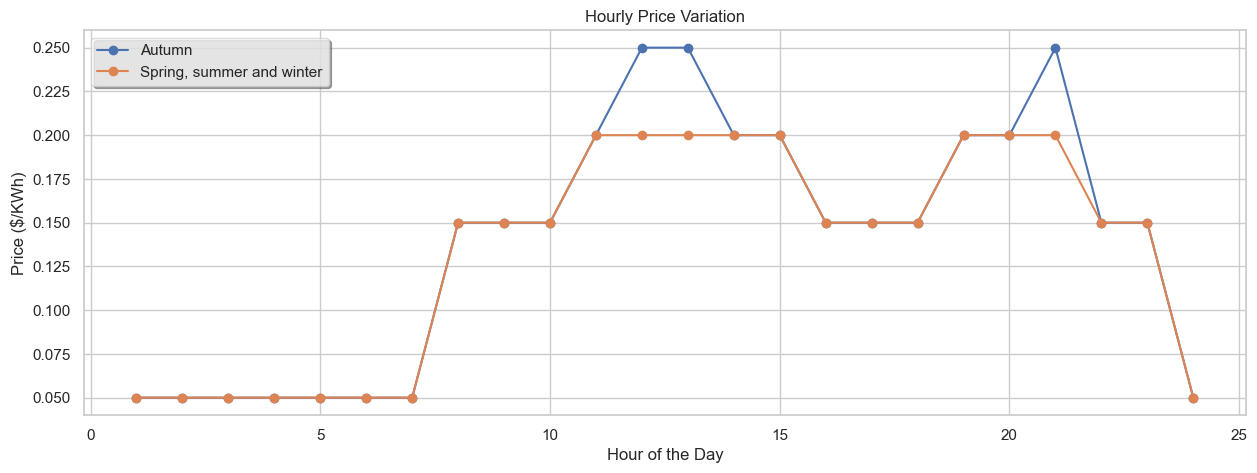

In [143]:
import matplotlib.pyplot as plt

# Price data
hours = list(range(1, 25))
price1 = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.15, 0.20, 0.25, 0.25, 0.20, 0.20, 0.15, 0.15, 0.15, 0.20, 0.20, 0.25, 0.15, 0.15, 0.05]
price2 = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.15, 0.20, 0.20, 0.20, 0.20, 0.20, 0.15, 0.15, 0.15, 0.20, 0.20, 0.20, 0.15, 0.15, 0.05]

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(hours, price1, 'o-', label='Autumn')  # 'o-' adds dots and lines
plt.plot(hours, price2, 'o-', label='Spring, summer and winter')  # 'o-' adds dots and lines

# Customize the plot
plt.title('Hourly Price Variation')
plt.xlabel('Hour of the Day')
plt.ylabel('Price ($/KWh)')
plt.legend()
plt.grid(True)
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=0.7)  # Display a box around the legend

# Save the plot
plt.savefig('prices.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
